In [116]:
#'''Importing Data Manipulation Modules'''
import numpy as np                 # Linear Algebra
import pandas as pd                # Data Processing, CSV file I/O (e.g. pd.read_csv)

#'''Seaborn and Matplotlib Visualization'''
import matplotlib                  # 2D Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns              # Python Data Visualization Library based on matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline

#'''Plotly Visualizations'''
import plotly as plotly                # Interactive Graphing Library for Python
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.offline as py
init_notebook_mode(connected=True)
import os
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


/Users/liuchen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['trace', 'cm', 'plot', 'f']
`%matplotlib` prevents importing * from pylab and numpy



In [265]:
df = pd.read_csv('winequality-red.csv')

In [266]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [346]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [347]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [348]:
def quality(dataframe):
    dataframe.loc[(dataframe['quality'] >= 2) & (dataframe['quality'] <= 6.5), 'quality'] = 0
    
    dataframe.loc[(dataframe['quality'] > 6.5) & (dataframe['quality'] <= 8), 'quality'] = 1
           
    return dataframe

quality(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [349]:
x = df.drop(['quality'],axis = 1)

In [350]:
y = df['quality']

In [351]:
labels = (df.quality.unique())
colors = ['Crimson', 'DarkBlue']

trace = go.Histogram(x=df.quality,marker=dict(color=colors,line=dict(color='black', width=2)),opacity=0.75)
layout = go.Layout(
    title='Quality distribution',
    xaxis=dict(
        title='Bad wine - Great wine'
    ),
    yaxis=dict(
        title='Count'
    ),
    bargap=0.2,
    bargroupgap=0.1, paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor="rgb(243, 243, 243)")
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'fixed acidity'),
  Text(1, 0, 'volatile acidity'),
  Text(2, 0, 'citric acid'),
  Text(3, 0, 'residual sugar'),
  Text(4, 0, 'chlorides'),
  Text(5, 0, 'free sulfur dioxide'),
  Text(6, 0, 'total sulfur dioxide'),
  Text(7, 0, 'density'),
  Text(8, 0, 'pH'),
  Text(9, 0, 'sulphates'),
  Text(10, 0, 'alcohol')])

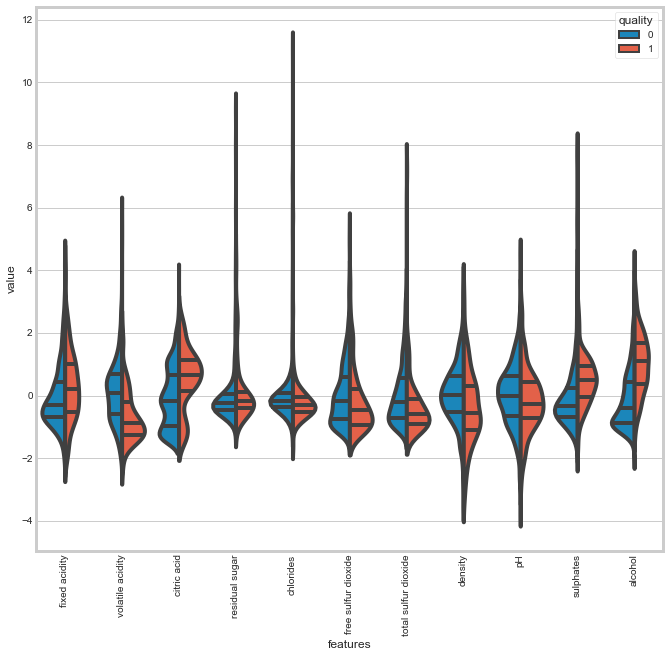

In [358]:
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization


data = pd.concat([y,data_n_2],axis=1)
data = pd.melt(data,id_vars="quality",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="quality", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'fixed acidity'),
  Text(1, 0, 'volatile acidity'),
  Text(2, 0, 'citric acid'),
  Text(3, 0, 'residual sugar'),
  Text(4, 0, 'chlorides'),
  Text(5, 0, 'free sulfur dioxide'),
  Text(6, 0, 'total sulfur dioxide'),
  Text(7, 0, 'density'),
  Text(8, 0, 'pH'),
  Text(9, 0, 'sulphates'),
  Text(10, 0, 'alcohol')])

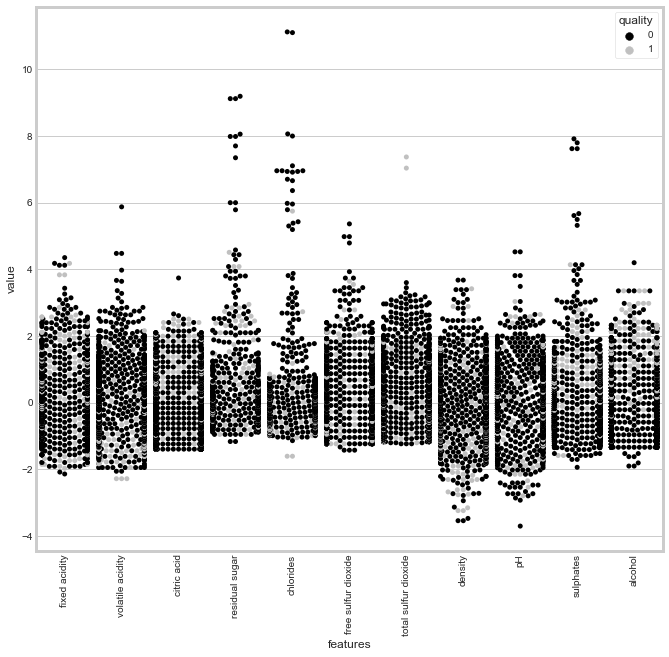

In [359]:
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2],axis=1)
data = pd.melt(data,id_vars="quality",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="quality", data=data,palette=["black", "silver"])

plt.xticks(rotation=90)

<AxesSubplot:>

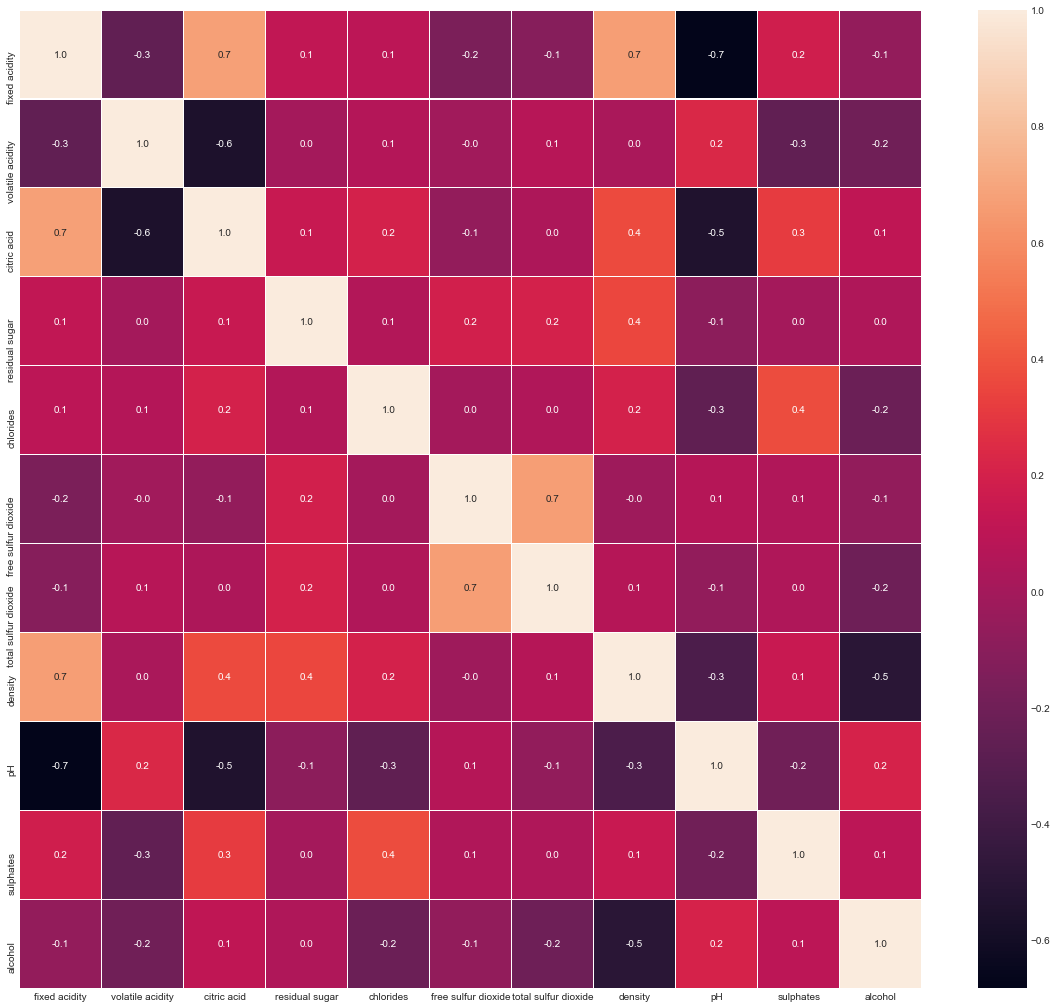

In [360]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [361]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [362]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

# Random Forest

In [357]:
accuracies = {}

In [363]:
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

Accuracy is:  0.9


<AxesSubplot:>

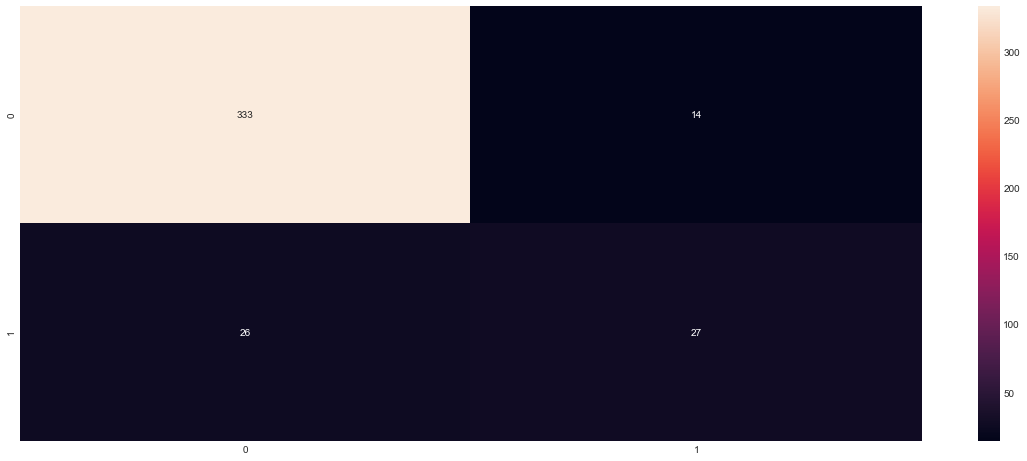

In [281]:

ac = accuracy_score(y_test,clf_rf.predict(x_test))

print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [282]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_1 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_1, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 6
Best features : Index(['volatile acidity', 'citric acid', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol'],
      dtype='object')


In [284]:
x_1 = df[['volatile acidity','citric acid','total sulfur dioxide','density','sulphates','alcohol']]

In [285]:
x_train, x_test, y_train, y_test = train_test_split(x_1,y, test_size=0.25, random_state=42)

In [286]:
clf_rf_1 = RandomForestClassifier(random_state=43)      
clr_rf_1 = clf_rf_1.fit(x_train,y_train)

In [324]:
from sklearn.metrics import classifica tion_report

Accuracy is:  0.855 

RFC Reports
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       347
           1       0.39      0.17      0.24        53

    accuracy                           0.85       400
   macro avg       0.64      0.56      0.58       400
weighted avg       0.82      0.85      0.83       400



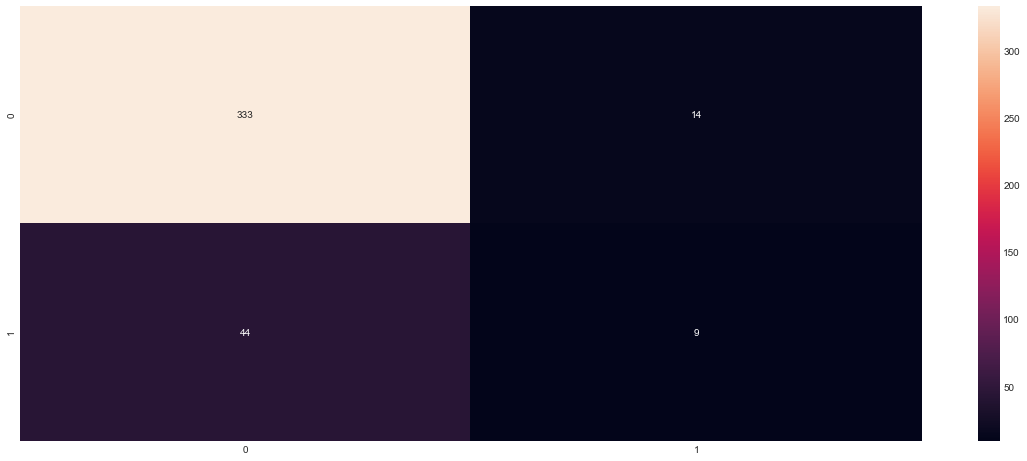

In [331]:
ac = accuracy_score(y_test,clf_rf_1.predict(x_test))
accuracies['Random_Forest'] = ac

print('Accuracy is: ',ac, '\n')
cm = confusion_matrix(y_test,clf_rf_1.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

print('RFC Reports\n',classification_report(y_test, clf_rf_1.predict(x_test)))

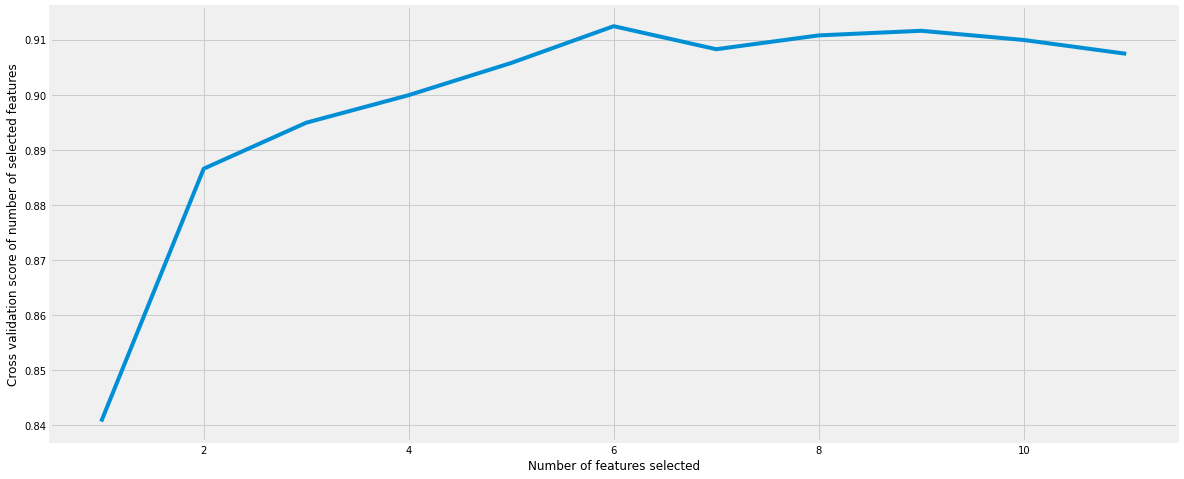

In [96]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [288]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

# LogisticRegression

Accuracy is:  0.8675 

Logistic regression Reports
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       347
           1       0.50      0.28      0.36        53

    accuracy                           0.87       400
   macro avg       0.70      0.62      0.64       400
weighted avg       0.84      0.87      0.85       400



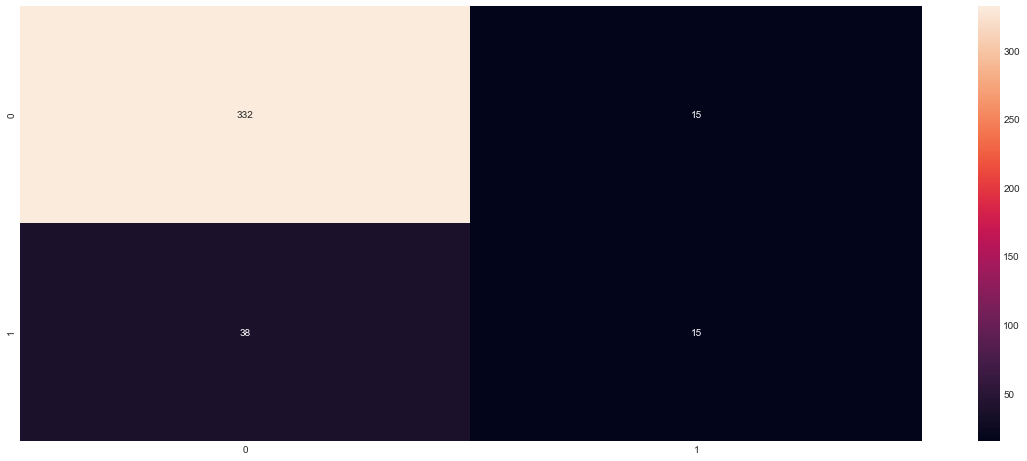

In [332]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() 
logmodel.fit(x_train,y_train)

ac = accuracy_score(y_test,logmodel.predict(x_test))
accuracies['Logistic regression'] = ac

print('Accuracy is: ',ac, '\n')
cm = confusion_matrix(y_test,logmodel.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

print('Logistic regression Reports\n',classification_report(y_test, logmodel.predict(x_test)))



In [290]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

x_trainK, x_testK, y_trainK, y_testK = train_test_split(x_1, y, test_size = 0.2, random_state = 101)

# KNN

k=1 86.94 (+/- 2.52)
k=2 87.57 (+/- 2.71)
k=3 86.48 (+/- 3.13)
k=4 87.10 (+/- 2.79)
k=5 86.87 (+/- 2.64)
k=6 86.64 (+/- 3.18)
k=7 86.01 (+/- 3.22)
k=8 86.32 (+/- 3.36)
k=9 86.16 (+/- 3.08)
k=10 86.17 (+/- 3.23)
k=11 85.54 (+/- 2.79)
k=12 85.93 (+/- 2.99)
k=13 85.70 (+/- 2.83)
k=14 86.09 (+/- 2.69)
k=15 86.16 (+/- 2.53)
k=16 86.48 (+/- 3.48)
k=17 86.24 (+/- 3.27)
k=18 86.24 (+/- 2.68)
k=19 86.40 (+/- 2.68)
k=20 86.24 (+/- 2.65)
k=21 86.17 (+/- 2.72)
k=22 86.40 (+/- 2.87)
k=23 86.40 (+/- 2.89)
k=24 86.48 (+/- 2.76)
k=25 86.40 (+/- 2.87)
The optimal number of neighbors is 1 with 87.6%


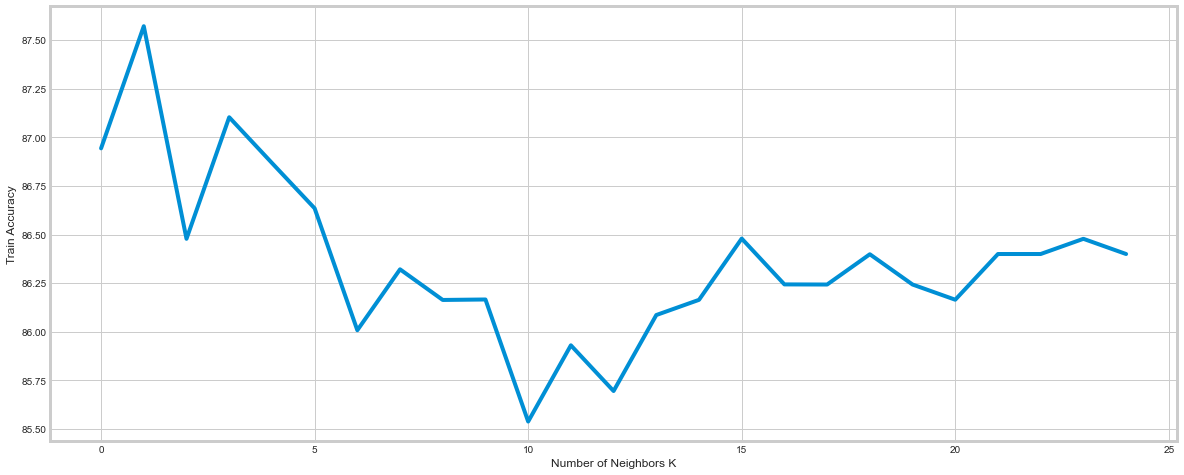

In [291]:
#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123)
    scores = model_selection.cross_val_score(knn, x_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

Accuracy is:  0.8975 

KNN Reports
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       347
           1       0.75      0.34      0.47        53

    accuracy                           0.90       400
   macro avg       0.83      0.66      0.71       400
weighted avg       0.89      0.90      0.88       400



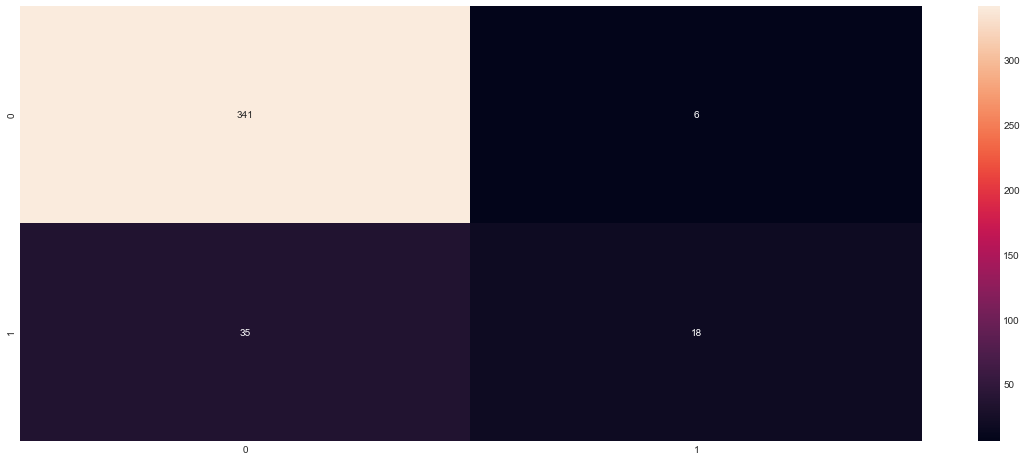

In [333]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)

ac = accuracy_score(y_test,knn.predict(x_test))
accuracies['KNN'] = ac


print('Accuracy is: ',ac, '\n')
cm = confusion_matrix(y_test,knn.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

print('KNN Reports\n',classification_report(y_test, knn.predict(x_test)))

# SVC

Accuracy is:  0.815


<AxesSubplot:>

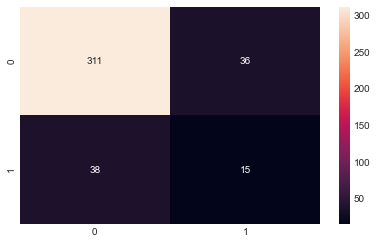

In [199]:
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(x_train, y_train)

ac = accuracy_score(y_test,svc.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,svc.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is:  0.9075 

SVM Reports
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       347
           1       0.68      0.57      0.62        53

    accuracy                           0.91       400
   macro avg       0.81      0.76      0.78       400
weighted avg       0.90      0.91      0.90       400



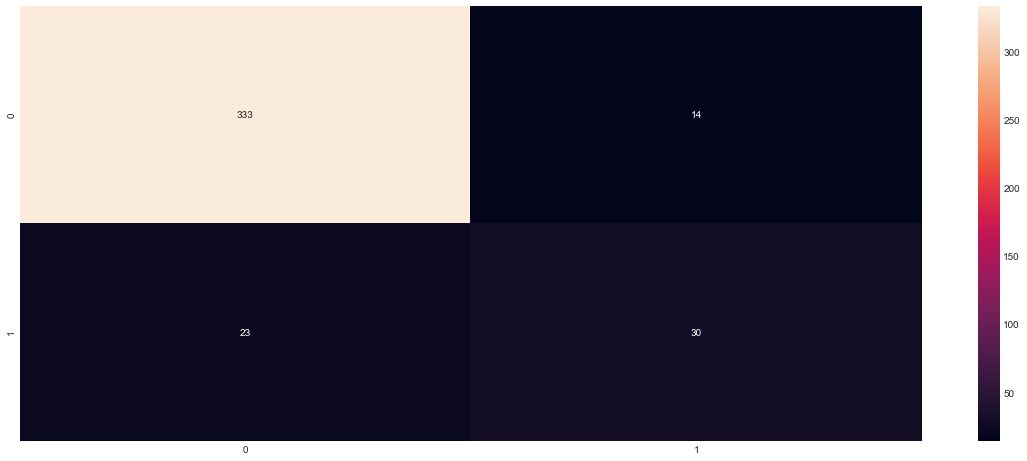

In [334]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(x_train, y_train)

ac = accuracy_score(y_test,svc.predict(x_test))
print('Accuracy is: ',ac, '\n')
cm = confusion_matrix(y_test,svc.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

print('SVM Reports\n',classification_report(y_test, svc.predict(x_test)))

In [294]:
from sklearn.tree import plot_tree

[Text(680.8695652173913, 792.75, 'alcohol <= 1.067\ngini = 0.236\nsamples = 1199\nvalue = [1035, 164]'),
 Text(305.3162471395881, 747.45, 'volatile acidity <= -1.093\ngini = 0.143\nsamples = 1017\nvalue = [938, 79]'),
 Text(118.97299771167047, 702.15, 'sulphates <= 0.314\ngini = 0.412\nsamples = 107\nvalue = [76, 31]'),
 Text(45.86910755148741, 656.85, 'total sulfur dioxide <= -1.099\ngini = 0.223\nsamples = 47\nvalue = [41, 6]'),
 Text(22.934553775743705, 611.55, 'citric acid <= 0.807\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(11.467276887871853, 566.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(34.401830663615556, 566.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(68.80366132723111, 611.55, 'citric acid <= -0.626\ngini = 0.136\nsamples = 41\nvalue = [38, 3]'),
 Text(57.336384439359264, 566.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(80.27093821510297, 566.25, 'alcohol <= 0.878\ngini = 0.095\nsamples = 40\nvalue = [38, 2]'),
 Text(57.336384439359264, 52

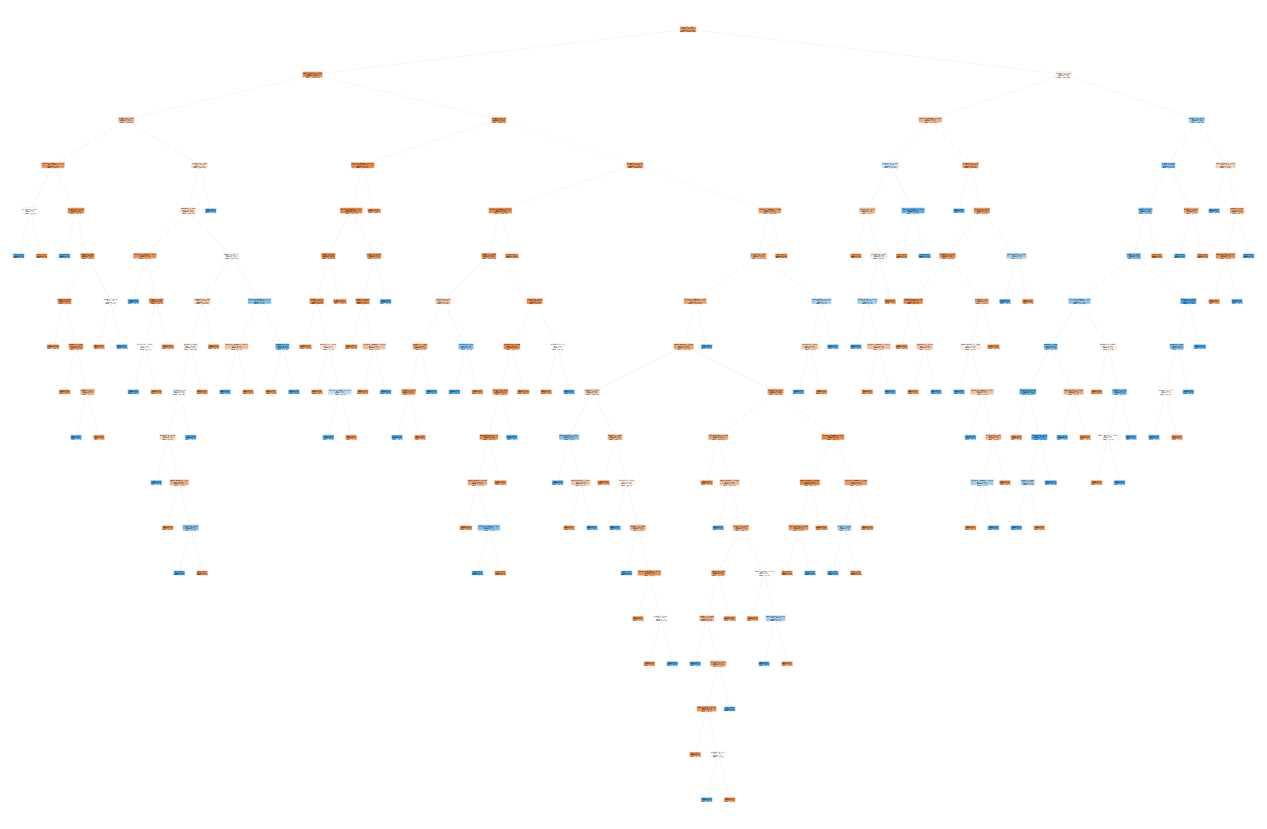

In [136]:
plt.figure(figsize=(20,15))
plot_tree(dtree,
         filled=True,
         rounded=True,
         feature_names=x_1.columns)

In [295]:
path = dtree.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]

dtrees = []

for ccp_alpha in ccp_alphas:
    dtree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dtree.fit(x_train,y_train)
    dtrees.append(dtree)

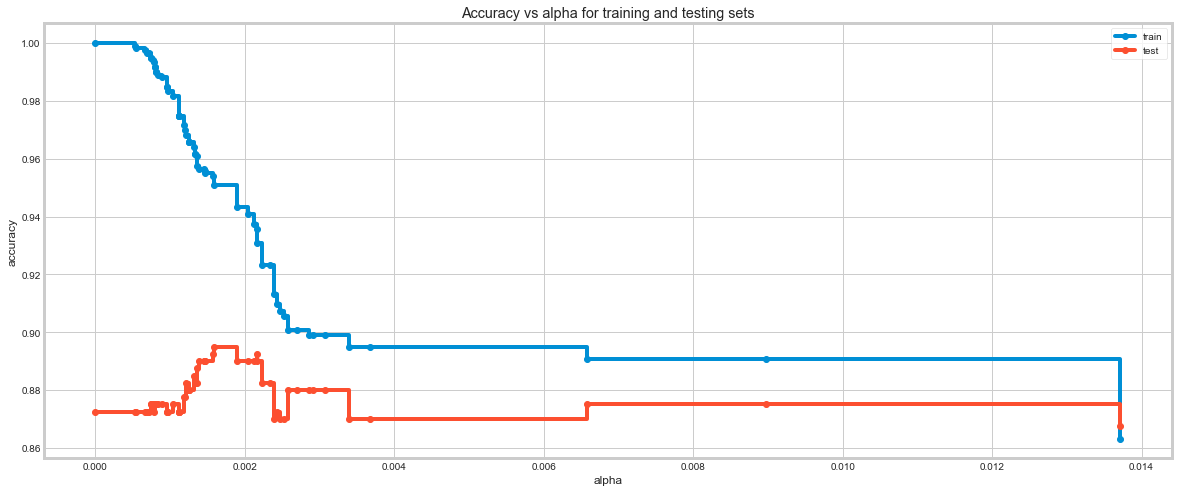

In [296]:
train_scores = [dtree.score(x_train,y_train) for dtree in dtrees]
test_scores = [dtree.score(x_test, y_test) for dtree in dtrees]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker = 'o', label = 'train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker = 'o', label = 'test', drawstyle='steps-post')
ax.legend()
plt.show()


<AxesSubplot:xlabel='alpha'>

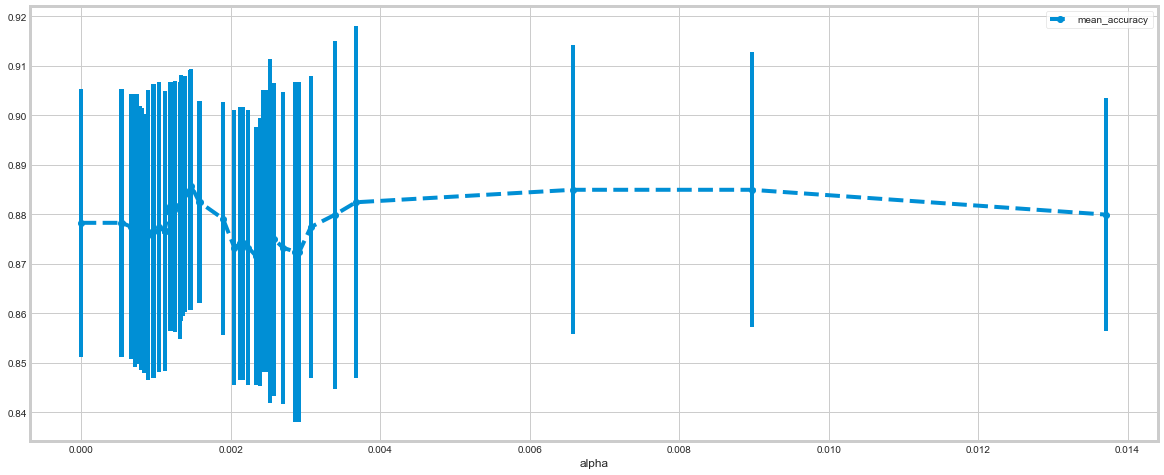

In [297]:
# create an array to store the results of each fold during cross validation
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    dtree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores =cross_val_score(dtree, x_train, y_train, cv=kfold, scoring='accuracy')
    alpha_loop_values.append([ccp_alpha, np.mean(scores),np.std(scores)])
    
alpha_results = pd.DataFrame(alpha_loop_values,
                             columns=['alpha','mean_accuracy','std'])
alpha_results.plot(x='alpha',
                   y='mean_accuracy',
                   yerr='std',
                   marker='o',
                   linestyle='--')

In [298]:
alpha_results[(alpha_results['alpha'] > 0.0033)
              & 
              (alpha_results['alpha'] < 0.0035)]

,alpha,mean_accuracy,std
57,0.003394,0.87993,0.035125


In [299]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.0033)
                                & 
                                (alpha_results['alpha'] < 0.0035)]['alpha']
ideal_ccp_alpha

57    0.003394
Name: alpha, dtype: float64

In [300]:
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.003394498807342843

Accuracy is:  0.87 

Decision Tree Reports
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       347
           1       0.51      0.36      0.42        53

    accuracy                           0.87       400
   macro avg       0.71      0.65      0.67       400
weighted avg       0.85      0.87      0.86       400



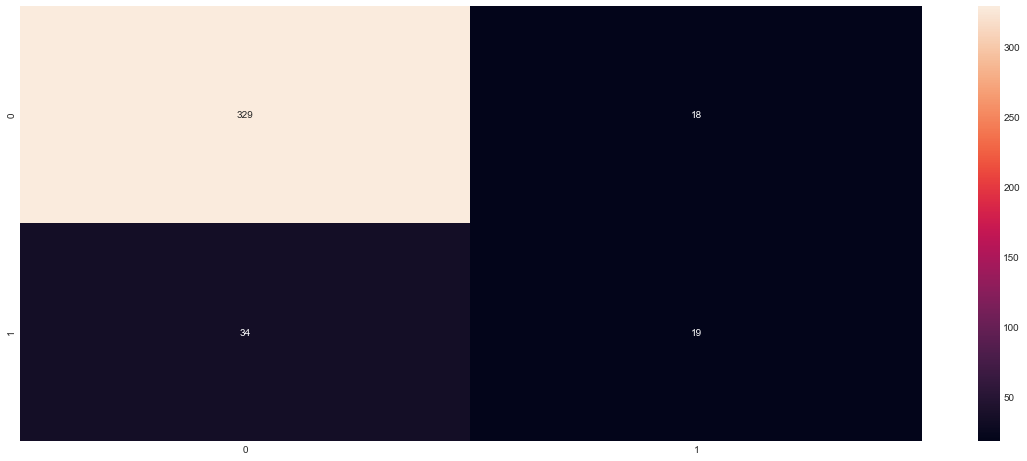

In [335]:
dtree1 = DecisionTreeClassifier(random_state=42,
                                ccp_alpha=ideal_ccp_alpha)
dtree1 = dtree1.fit(x_train, y_train)

ac = accuracy_score(y_test,dtree1.predict(x_test))
accuracies['decisiontree'] = ac


print('Accuracy is: ',ac,'\n')
cm = confusion_matrix(y_test,dtree1.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

print('Decision Tree Reports\n',classification_report(y_test, dtree1.predict(x_test)))

# SVM

In [302]:
from sklearn.svm import SVC
svc1= SVC(random_state = 42)
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [303]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'C':[0.5,1,10,100],
     'gamma': ['scale',1,0.1,0.01,0.001,0.0001],
     'kernel': ['rbf']},
]

optimal_params = GridSearchCV(
        SVC(),
        param_grid,
        cv = k_fold,
        scoring='accuracy',
        verbose = 0
    )
optimal_params.fit(x_train, y_train)
print(optimal_params.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


Accuracy is:  0.9075 

SVM report
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       347
           1       0.68      0.57      0.62        53

    accuracy                           0.91       400
   macro avg       0.81      0.76      0.78       400
weighted avg       0.90      0.91      0.90       400



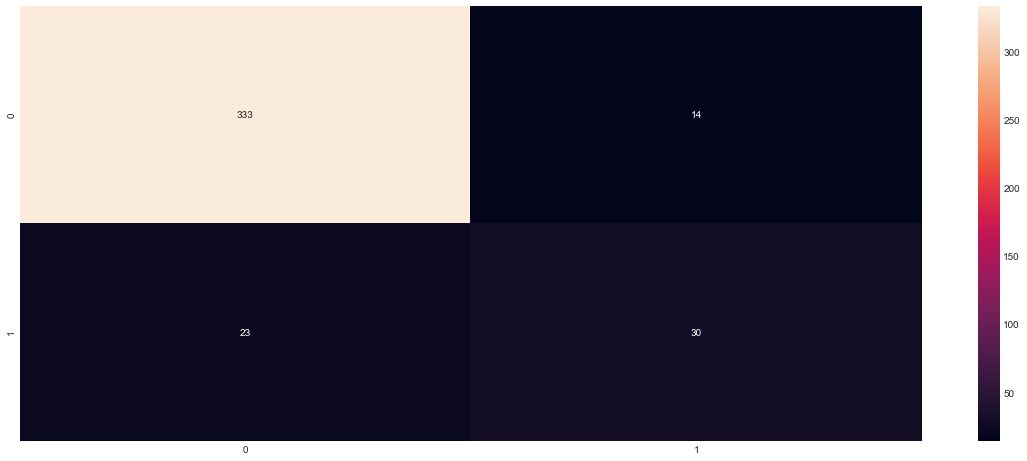

In [337]:
svc1= SVC(random_state = 42, C = 10, gamma = 1, kernel = 'rbf')
svc1.fit(x_train, y_train)

ac = accuracy_score(y_test,svc1.predict(x_test))
accuracies['SVM'] = ac


print('Accuracy is: ',ac, '\n')
cm = confusion_matrix(y_test,svc1.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

print('SVM report\n',classification_report(y_test, svc1.predict(x_test)))

Accuracy is:  0.855 

GaussianNB report
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       347
           1       0.46      0.62      0.53        53

    accuracy                           0.85       400
   macro avg       0.70      0.76      0.72       400
weighted avg       0.88      0.85      0.86       400



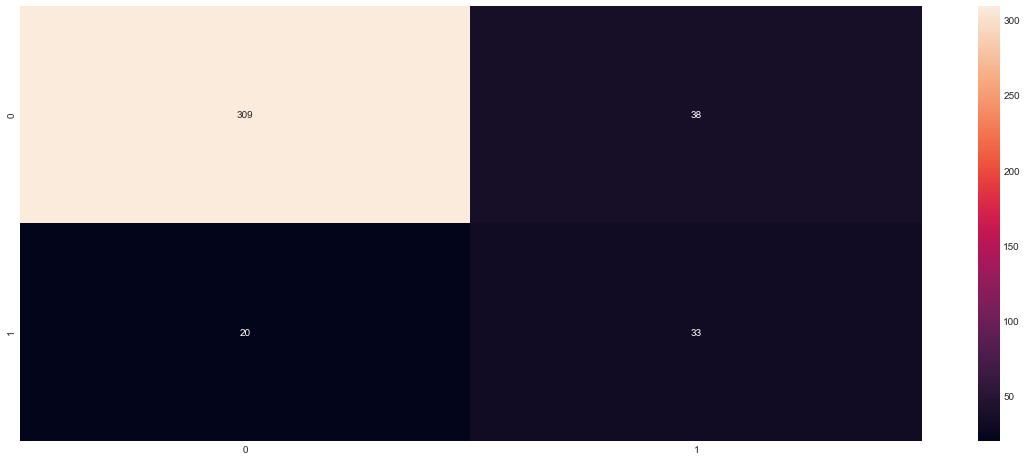

In [338]:
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(x_train, y_train)

ac = accuracy_score(y_test,gaussiannb.predict(x_test))
accuracies['GaussianNB'] = ac


print('Accuracy is: ',ac,'\n')
cm = confusion_matrix(y_test,gaussiannb.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

print('GaussianNB report\n',classification_report(y_test, gaussiannb.predict(x_test)))

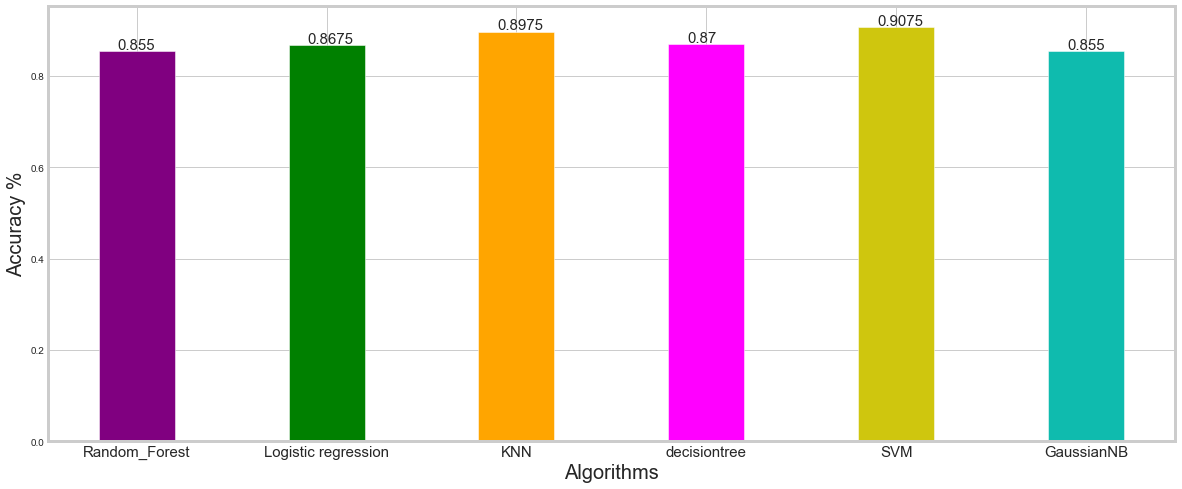

In [339]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

plt.rcParams['figure.figsize'] = (18,8)

x=list(accuracies.keys())
y=list(accuracies.values())

bars = plt.bar(x, height=y, width=.4, color = colors)

xlocs, xlabs = plt.xticks()

xlocs=[i for i in x]
xlabs=[i for i in x]

plt.xlabel('Algorithms', size = 20)
plt.ylabel('Accuracy %', size = 20)
plt.xticks(xlocs, xlabs, size = 15)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + .1, yval + .005, yval, size = 15)

plt.show()

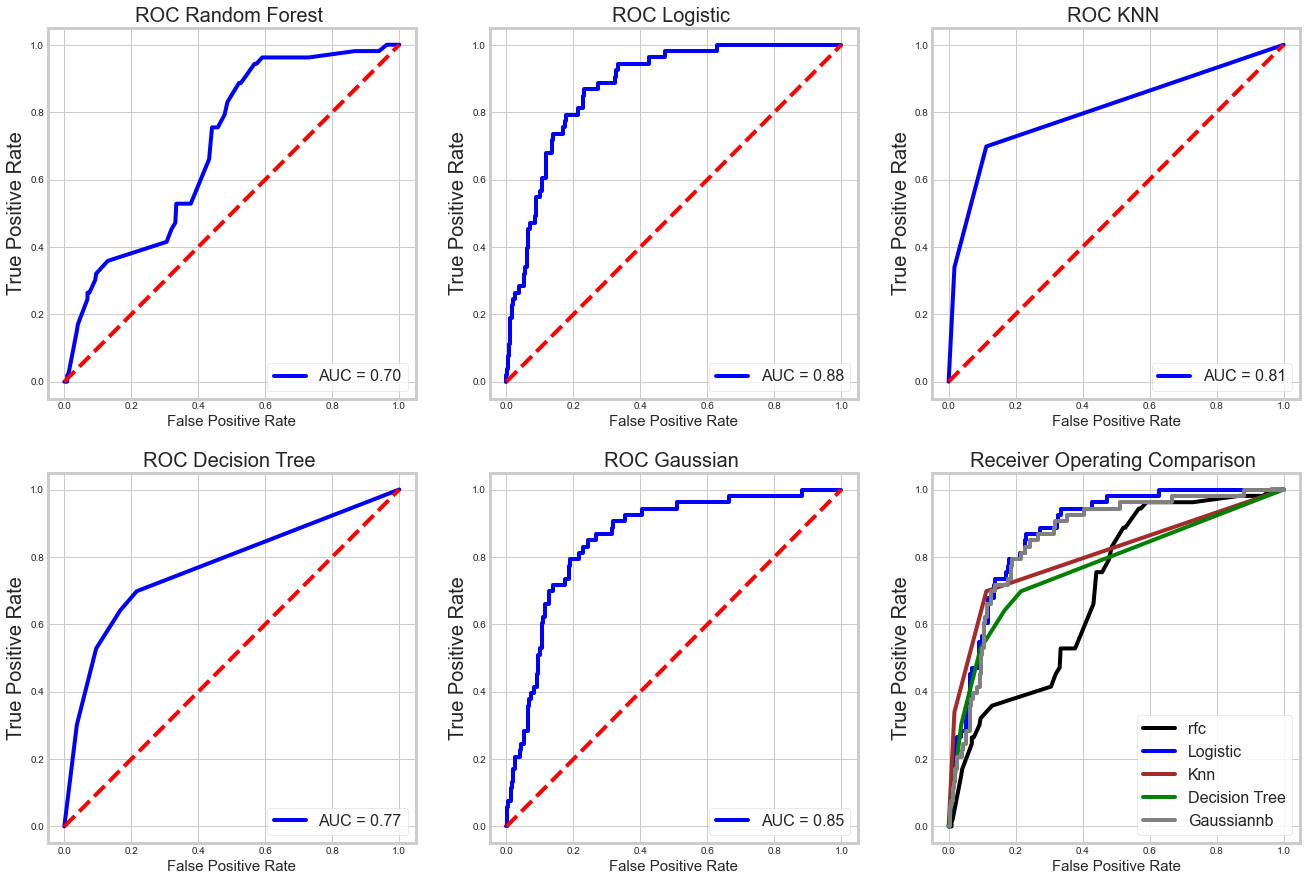

In [340]:
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))
from sklearn import metrics

#RandomForest
probs = clf_rf_1.predict_proba(x_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,0].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('ROC Random Forest ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#LOGMODEL
probs = logmodel.predict_proba(x_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,1].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('ROC Logistic ',fontsize=20)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#KNN
probs = knn.predict_proba(x_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0,2].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('ROC KNN ',fontsize=20)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#DECISION TREE ---------------------
probs = dtree1.predict_proba(x_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('ROC Decision Tree ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})


#Gaussiannb

probs = gaussiannb.predict_proba(x_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)

ax_arr[1,1].plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('ROC Gaussian ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

#All plots
ax_arr[1,2].plot(fprrfc, tprrfc, 'b', label = 'rfc', color='black')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color='blue')
ax_arr[1,2].plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
ax_arr[1,2].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='green')
ax_arr[1,2].plot(fprgau, tprgau, 'b', label = 'Gaussiannb', color='grey')
ax_arr[1,2].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})